In [456]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [458]:
df = pd.read_csv('survey.csv')
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [460]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [462]:
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [464]:
#rename and lower case columns
df_rename = df.copy()
df_rename.columns = df_rename.columns.str.lower()
df_rename.head()
df = df_rename.copy()

In [466]:
df_clean = df.copy()
#clean gender
def standardize_gender(gender):
    if pd.isna(gender):
        return 'Unknown'
    gender = str(gender).lower().strip()

    #Male Variations
    if gender in ['male', 'm', 'mal', 'male-ish', 'male (cis)', 'cis male', 
                 'cis man', 'maile', 'malr', 'mail', 'make', 'man', 
                 'msle', 'male leaning androgynous', 'guy (-ish) ^_^', 
                 'something kinda male?', 'ostensibly male, unsure what that really means']:
        return 'Male'

    #female variations
    elif gender in ['female', 'f', 'femake', 'female (cis)', 'female (trans)', 
                   'cis female', 'cis-female/femme', 'femail', 'woman', 
                   'trans woman', 'trans-female']:
        return 'Female'
    elif gender in ['non-binary', 'queer', 'genderqueer', 'fluid', 'agender', 
                   'androgyne', 'enby', 'queer/she/they', 'neuter', 'all', 
                   'nah', 'p']:
        return 'Other'
    return 'Other'

df_clean['gender'] = df_clean['gender'].apply(standardize_gender)

In [470]:
def clean_age(age):
    try:
        age = float(age)
        if 0 <= age <= 120:
            return age
        else:
            return np.nan
    except:
        return np.nan
df_clean['age'] = df_clean['age'].apply(clean_age)

In [472]:
df_clean

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37.0,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44.0,Male,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32.0,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31.0,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31.0,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26.0,Male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32.0,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34.0,Male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46.0,Female,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [474]:
df_clean['state'] = df_clean['state'].fillna('Unknown')
df_clean['self_employed'] = df_clean['self_employed'].map({'Yes': 1, 'No': 0, np.nan: -1})
df_clean['family_history'] = df_clean['family_history'].map({'Yes': 1, 'No': 0, np.nan: -1})
df_clean['treatment'] = df_clean['treatment'].map({'Yes': 1, 'No': 0, np.nan: -1})
df_clean['work_interfere'] = df_clean['work_interfere'].fillna('Unknown')
df_clean['comments'] = df_clean['comments'].fillna('Unknown')
df_clean['obs_consequence'] = df_clean['obs_consequence'].map({'Yes': 1, 'No': 0, np.nan: -1})
df_clean['age'] = df_clean['age'].fillna(df_clean['age'].median())

In [476]:
df = df_clean.copy()

In [478]:
df

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37.0,Female,United States,IL,-1,0,1,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,0,Unknown
1,2014-08-27 11:29:37,44.0,Male,United States,IN,-1,0,0,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,0,Unknown
2,2014-08-27 11:29:44,32.0,Male,Canada,Unknown,-1,0,0,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,0,Unknown
3,2014-08-27 11:29:46,31.0,Male,United Kingdom,Unknown,-1,1,1,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,1,Unknown
4,2014-08-27 11:30:22,31.0,Male,United States,TX,-1,0,0,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,0,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26.0,Male,United Kingdom,Unknown,0,0,1,Unknown,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,0,Unknown
1255,2015-09-26 01:07:35,32.0,Male,United States,IL,0,1,1,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,0,Unknown
1256,2015-11-07 12:36:58,34.0,Male,United States,CA,0,1,1,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,0,Unknown
1257,2015-11-30 21:25:06,46.0,Female,United States,NC,0,0,0,Unknown,100-500,...,Don't know,Yes,No,No,No,No,No,No,0,Unknown


In [480]:
treatments = df['treatment'].value_counts()
treatments

treatment
1    637
0    622
Name: count, dtype: int64

In [484]:
treatment_by_gender = df.groupby('gender')['treatment'].value_counts()
treatment_by_gender

gender  treatment
Female  1            173
        0             78
Male    0            543
        1            452
Other   1             12
        0              1
Name: count, dtype: int64

In [520]:
df['age_group'] = pd.cut(df['age'], bins=[0,20,30, 40, 50, 60, 120], labels=['<20', '20-29', '30-39', '40-49', '50-59', '60+'])
treatment_by_age_group = df.groupby('age_group')['treatment'].value_counts()
treatment_by_age_group

/var/folders/pm/8pbgcwgj11lg9k16sfnzp2400000gn/T/ipykernel_1170/3930709833.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  treatment_by_age_group = df.groupby('age_group')['treatment'].value_counts()


age_group  treatment
<20        0             15
           1             10
20-29      0            292
           1            265
30-39      1            275
           0            254
40-49      1             70
           0             52
50-59      1             15
           0              7
60+        0              2
           1              2
Name: count, dtype: int64

In [540]:
benefits = df['benefits'].value_counts()
benefits

benefits
Yes           477
Don't know    408
No            374
Name: count, dtype: int64

In [548]:
awareness_by_country = df.groupby('country')['wellness_program'].value_counts()
awareness_by_country

country        wellness_program
Australia      No                   10
               Yes                   8
               Don't know            3
Austria        Don't know            3
Bahamas, The   Yes                   1
                                  ... 
United States  No                  455
               Yes                 167
               Don't know          129
Uruguay        Don't know            1
Zimbabwe       No                    1
Name: count, Length: 74, dtype: int64

In [554]:
df.groupby('benefits')['seek_help'].value_counts()

benefits    seek_help 
Don't know  Don't know    213
            No            174
            Yes            21
No          No            327
            Yes            24
            Don't know     23
Yes         Yes           205
            No            145
            Don't know    127
Name: count, dtype: int64

Text(0.5, 0, '0 = No, 1 = Yes')

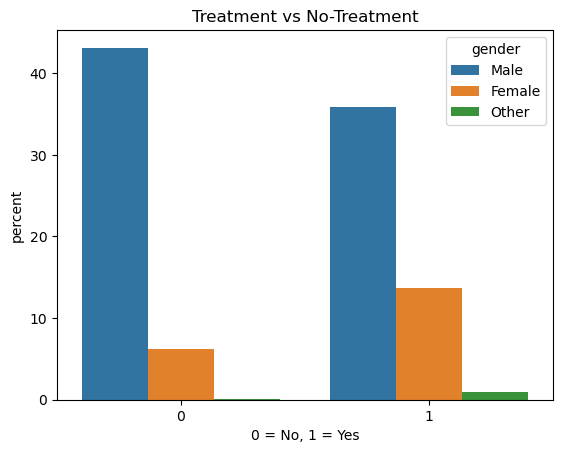

In [580]:
#Countplot for treantment vs no-treatment
plt.title('Treatment vs No-Treatment')
sns.countplot(data=df, x='treatment', hue="gender", stat="percent")
plt.xlabel('0 = No, 1 = Yes')

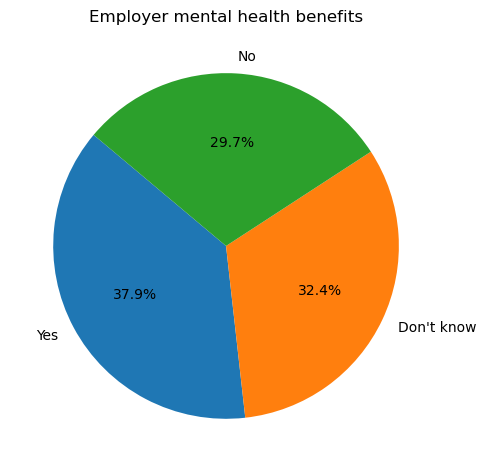

In [606]:
plt.figure(figsize=(5,5))
benefits.plot.pie(autopct='%1.1f%%', startangle=140, legend=False)
plt.ylabel('')
plt.title('Employer mental health benefits')
plt.tight_layout()
plt.savefig('pirplot')
plt.show()

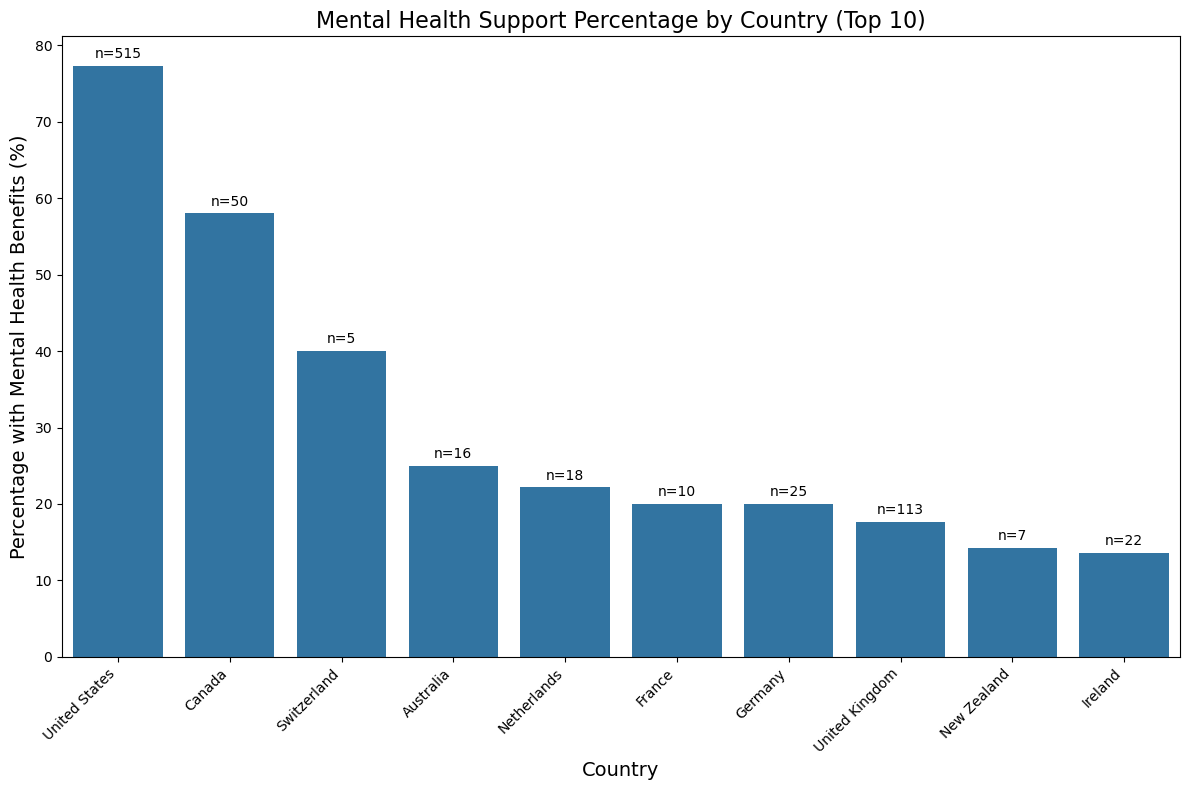

In [658]:
# Step 1: Get counts or percentages of mental health support by country
# Option A: If you want to count people with access to mental health support
country_support = df.groupby('country')['benefits'].apply(lambda x: (x == 1).sum()).reset_index(name='count')

# Option B: If you want percentage with access to mental health support
country_support_pct = df.groupby('country').agg(
    total=('benefits', 'count'),
    has_support=('benefits', lambda x: (x == 1).sum())
).reset_index()
country_support_pct['support_percentage'] = (country_support_pct['has_support'] / country_support_pct['total'] * 100).round(1)

# Step 2: Get top 10 countries by count or percentage (and have at least 5 respondents)
min_respondents = 5
top_countries = country_support_pct[country_support_pct['total'] >= min_respondents].sort_values(
    by='support_percentage', ascending=False).head(10)

# Step 3: Create the barplot
plt.figure(figsize=(12, 8))

# Option for percentage plot
ax = sns.barplot(x='country', y='support_percentage', data=top_countries)
ax.set_title('Mental Health Support Percentage by Country (Top 10)', fontsize=16)
ax.set_xlabel('Country', fontsize=14)
ax.set_ylabel('Percentage with Mental Health Benefits (%)', fontsize=14)

# Add count labels on bars
for i, row in enumerate(top_countries.itertuples()):
    ax.text(i, row.support_percentage + 1, f"n={row.total}", ha='center')

# Rotate country labels for better readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('boxplot')
plt.show()

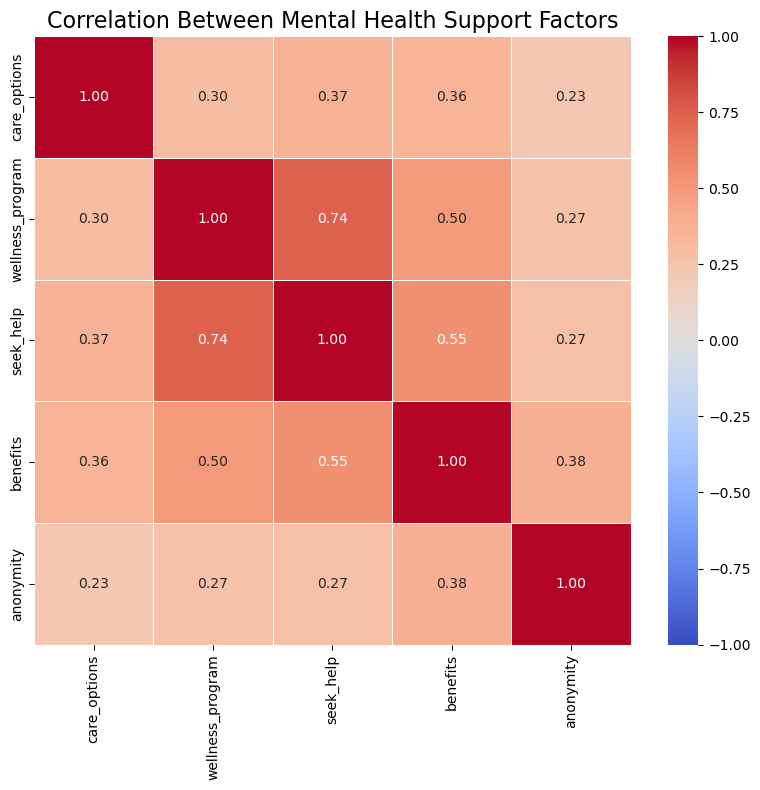

In [644]:
# Convert binary string columns to numeric (1/0)
for col in mental_health_cols:
    if df[col].dtype == 'object':  # If column contains strings
        df[col] = df[col].map({'Yes': 1, 'No': 0})
mental_health_cols = ['care_options', 'wellness_program', 'seek_help', 
                      'benefits', 'anonymity']

# Create correlation matrix (only for rows without NaN values)
correlation_matrix = df[mental_health_cols].dropna().corr()
plt.figure(figsize=(8, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, 
            annot=True,        # Show correlation values
            cmap='coolwarm',   # Color map (red for negative, blue for positive)
            vmin=-1,           # Minimum correlation value
            vmax=1,            # Maximum correlation value
            center=0,          # Center the colormap at 0
            linewidths=.5,     # Width of the grid lines
            fmt='.2f')         # Format for correlation values (2 decimal places)

plt.title('Correlation Between Mental Health Support Factors', fontsize=16)
plt.tight_layout()
plt.show()